# 重回帰分析

単回帰分析では説明変数が1つですが、重回帰分析では説明変数は2つ以上になります。

$y_i=\beta_0+\sum_{j=1}^k\beta_jx_{ij}+u_i$

* $i = 1, 2, ... n$: 観測値のインデックス
* $j = 1, 2, ... k$: 説明変数のインデックス

回帰分析と同じく`statsmodels`を用いて推定を行います。推定結果の見方に大きな変わりはありません。



In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

ここでは、`bwght`というデータセットを用いて重回帰分析を行います。

妊娠中の喫煙が乳幼児の健康に与える影響を調べたデータで、など14個の変数に関する1388個の観測値を持つデータです。

データの説明の説明は[こちら](https://search.r-project.org/CRAN/refmans/wooldridge/html/bwght.html)を確認してください。


まずデータをダウンロードします。

In [64]:
data = sm.datasets.get_rdataset('bwght','wooldridge').data
data.head(2)

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903



乳幼児の健康を測る指標の一つである出生体重(`bwght`)と、出生体重に影響を与える可能性のある妊娠中の喫煙（`ciga`）やそれ以外の要因に関する変数があります。例えば、一般的に父親の所得（`faminc`）が高いと、より良い出産前ケアにアクセスでき、母親の栄養状態も良くなります。

このことを確認するために、次の重回帰分析を行います。

$$bwght=\beta_0+\beta_1 cigs + \beta_2 faminc + u$$


出生体重`bwght`を被説明変数、妊娠中の喫煙`cigs`と父親の学歴：`fatheduc`を説明変数して重回帰分析を実行してみましょう。

データの基本統計量と変数間の相関を確認します。

In [73]:
data.shape

(1388, 14)

In [88]:
data[['bwght','cigs','fatheduc']].corr()

,bwght,cigs,fatheduc
bwght,1.000000,-0.164372,0.084030
cigs,-0.164372,1.000000,-0.179244
fatheduc,0.084030,-0.179244,1.000000


In [72]:
data[['bwght', 'cigs', 'fatheduc']].describe()

,bwght,cigs,fatheduc
count,1388.000000,1388.000000,1192.000000
mean,118.699568,2.087176,13.186242
std,20.353964,5.972688,2.745985
min,23.000000,0.000000,1.000000
25%,107.000000,0.000000,12.000000
50%,120.000000,0.000000,12.000000
75%,132.000000,0.000000,16.000000
max,271.000000,50.000000,18.000000


`fatheduc`変数は欠損値が196行であることがわかります。

ここでは、欠損値のある行は分析から除外することにします。

In [86]:
data = data.dropna(subset=['fatheduc'])
data = data.reset_index(drop=True)

In [87]:
mmod = sm.OLS.from_formula('bwght ~ cigs + fatheduc', data= data)
mres = mmod.fit()
print(mres.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     18.45
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.29e-08
Time:                        17:09:10   Log-Likelihood:                -5251.7
No. Observations:                1192   AIC:                         1.051e+04
Df Residuals:                    1189   BIC:                         1.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0958      2.906     39.612      0.0

なお`statsmodels`の`from_formula`を用いる場合は定数項（$\beta_0$）は自動で挿入されます。
定数項をモデルに入れない場合は、式に`-1`を加えます。

```{warning}
`statsmodels`の他の関数や、`statsmodels`以外の他のパッケージを利用する場合は定数項の扱いが異なりますので、パッケージのドキュメントを確認してから使うようにしましょう。

例えば`statsmodels.api.OLS`を用いる場合は明示的に定数項を追加する必要があります。
```

以下、`statsmodels.api.OLS`関数を用いて同じ重回帰分析を行います。

In [111]:
# 被説明変数
y = data['bwght']
# 説明変数
X = data[['cigs','fatheduc']]
# 定数項を追加
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     18.45
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.29e-08
Time:                        19:01:02   Log-Likelihood:                -5251.7
No. Observations:                1192   AIC:                         1.051e+04
Df Residuals:                    1189   BIC:                         1.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.0958      2.906     39.612      0.0

`sm.OLS.from_formula`と同じ結果が得られることを確認しましょう。

## B.L.U.E.
最小二乗法では次の仮定が成り立っていることが前提となります。

* 母集団におけるモデル(真のモデル)が次式で表される（母集団モデルが線型）

$$Y=\beta_0+\beta_1x_1+\beta_2x_2+u$$　


* 母集団から標本サイズ$n$が無作為に抽出される${(x_i,y_i)}$(ただし$i=1,...,n$)（Random Sampling, 無作為抽出）
    * この仮定により、$ Corr(u_i,u_j|x)=0, i \neq j$ となる（誤差項同士で関係性がない）
    
    
* $E[U|X]=0$（説明変数と誤差項は平均独立）
    * 誤差項の条件付き期待値は0
    
* 説明変数Xに変動がある（全ての観測値が同じではない）

* 誤差項の分散は均一（homoskedasticity）
    * 説明変数は誤差項の分散に影響を与えない

    $$Var(u|X)=\sigma^2$$

これらの仮定をガウス=マルコフ仮定と呼びます。仮定が満たされていれば、最小二乗推定量は最良線形不偏推定量`BLUE`（`Best`, `Liner`, `Unbiased`, `Estimator`）となります

```{note}
複数の説明変数を用いる重回帰分析では説明変数間の相関関係が非常に強いと<strong>多重共線性(Multicollinearity)</strong>という問題が生じるため注意が必要です。多重共線性の問題が生じると、本来は統計的に優位であるはずの要因が有意でなくなってしまったり、本来の推定値の符号が逆になってしまったりします。

多重共線性の確認方法としてはvariance inflation factors (VIF)があります。

statsmodelsでも算出できます。VIFの値が大きい場合（例えば10以上の場合）は多重共線性が存在している可能性があるので対処すべきです。

```

多重共線性の問題が生じていないかもVIFで確認しましょう。

VIFを`statsmodels`を用いて確認します。

各説明変数について、VIFを計算し、dataframeに保存します。

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,25.547012
1,cigs,1.033195
2,fatheduc,1.033195


## 残差プロット

予測値に対して残差をプロットして、残差の等分散性(Heteroscedasticity)や独立性を確認します。

* 予測値の区間で残差が0を中心に均一に散らばっていれば良いですが、
* 区間によってばらつきが違う場合や明らかな傾向がある場合は等分散性や独立性が成り立っていない可能性があります

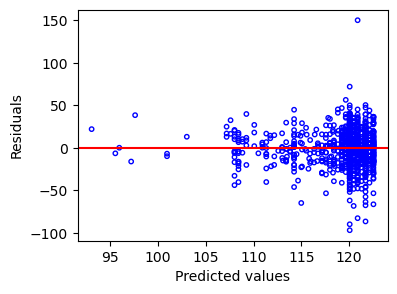

In [124]:
y_pred = results.predict()
residuals = results.resid

fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0, color = 'red')
ax.scatter(y_pred, residuals, facecolor='none', edgecolor='blue', s=10)
ax.set_ylabel('Residuals')
ax.set_xlabel('Predicted values')
plt.show()

## 不均一分散(Heteroscedasticity)

線型回帰の主な前提の一つとしてデータの等分散性がありました。
残差プロットを使ってプロットすることで確認しましょう。

もしも、残差プロットから明らかな偏りなどがみて取れる場合は、検定を行うことも有用です。

不均一分散の有無を検定する方法として`Breusch-Pagan検定`が一般的に使われます。
`statsmldels`のパッケージには`het_breushpagan`という関数があります。

関数のドキュメントは[こちら](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html)。

Breusch-Pagan検定では、以下の帰無仮説と対立仮説を用います：

* 帰無仮説（H0）： 帰無仮説（H0）：等分散性が存在する。
* 対立仮説：（Ha）： 帰無仮説（H0）：等分散が存在しない（すなわち、不均一分散が存在する）。

In [129]:
import statsmodels.stats.diagnostic as smd
lm, lm_pval, _, _ = smd.het_breuschpagan(results.resid, results.model.exog)
print(lm, lm_pval)

0.8119188474785499 0.6663372043484885


この例の場合では、検定のラグランジュ乗数統計量は0.81で、対応するp値は0.66です。

よって、帰無仮説を棄却することはできず、回帰モデルに不均一分散が存在すると言える十分な証拠はないと判断します。

### 分散が不均一な場合

不均一分散の場合は、必要な変数が欠けていないかなどそもそもの関数形の見直しや、対数変換など変数の変換、一般か線形モデルなどを使用することで対応することもできます。
また、statsmodelsのオプションとして`cov_type='HC0'`を用いると、ホワイトの分散不均一のための推定を行います。

In [133]:
mres_new_white = model.fit(cov_type='HC0')
print(mres_new_white.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     20.87
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.23e-09
Time:                        19:50:55   Log-Likelihood:                -5251.7
No. Observations:                1192   AIC:                         1.051e+04
Df Residuals:                    1189   BIC:                         1.052e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.0958      2.671     43.095      0.0